<a href="https://colab.research.google.com/github/prajwalvis/excelr-datascience-assignments/blob/master/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('spotify.csv')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920.0
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920.0
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920.0
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920.0
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920.0


# EXPLORATORY DATA ANALYSIS

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60871 entries, 0 to 60870
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      60871 non-null  float64
 1   artists           60871 non-null  object 
 2   danceability      60871 non-null  float64
 3   duration_ms       60871 non-null  int64  
 4   energy            60871 non-null  float64
 5   explicit          60871 non-null  int64  
 6   id                60871 non-null  object 
 7   instrumentalness  60871 non-null  float64
 8   key               60871 non-null  int64  
 9   liveness          60871 non-null  float64
 10  loudness          60871 non-null  float64
 11  mode              60871 non-null  int64  
 12  name              60871 non-null  object 
 13  popularity        60871 non-null  int64  
 14  release_date      60871 non-null  object 
 15  speechiness       60871 non-null  float64
 16  tempo             60871 non-null  float6

In [8]:
df.shape

(60871, 19)

In [ ]:
df.isnull().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

In [ ]:
df.duplicated().sum()

2159

In [13]:
# examine duplicated rows
df.loc[df.duplicated(), :]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
9525,0.567000,['Neil Diamond'],0.515,180253,0.6410,0,1BmVQ5RGqqtF5cnsv6cQYu,0.064200,5,0.3220,-5.573,1,"Girl, You'll Be A Woman Soon",60,1968,0.0272,109.558,0.655,1968.0
9534,0.027100,['Neil Diamond'],0.560,163907,0.8270,0,2SS3WeSe24ZqTlTSK4KzQZ,0.002850,8,0.0551,-4.157,1,Cherry Cherry,54,1968,0.0306,84.383,0.904,1968.0
16113,0.974000,"['Johann Strauss II', 'Riccardo Muti', 'Wiener...",0.219,459053,0.0855,0,5zZbXSRIFe1uWNmEM7f2XI,0.922000,0,0.3550,-19.703,0,"Frühlingsstimmen, Walzer, Op. 410",34,2021-01-08,0.0404,171.849,0.156,2021.0
16663,0.355000,"['Waylon Jennings', 'Willie Nelson']",0.626,184267,0.4570,0,0sFq478LIo9BFwf2qzMzzF,0.000009,4,0.0668,-13.785,1,The Year 2003 Minus 25 - Remastered,43,1978-01-01,0.0384,102.166,0.474,1978.0
16669,0.202000,['Ten Years After'],0.384,224133,0.5160,0,19HjHUjCfDrEYhVSIKG6nK,0.180000,9,0.1140,-12.032,0,I'd Love to Change the World - 2004 Remaster,60,1971-11-11,0.0345,118.129,0.371,1971.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58535,0.015700,['Workout Music '],0.790,238364,0.6440,0,05TSQR14yE0xP1qvCp5w6W,0.008960,6,0.0532,-8.104,1,Old Town Road (Cardio + Running Workout Mix),7,2020-12-23,0.1190,144.987,0.530,2020.0
58537,0.001600,['Workout Music '],0.667,230567,0.9790,0,4PD2SdeD28VgqnZyg2xaso,0.605000,5,0.6770,-3.261,0,"10,000 Hours (Cardio + Running Workout Mix)",8,2020-12-23,0.0575,141.984,0.963,2020.0
58539,0.012600,['Workout Music '],0.729,253473,0.8890,0,72HbkBc8pynTMmPodnAQIz,0.002600,6,0.0371,-4.105,1,Rescue (Cardio + Running Workout Mix),8,2020-12-23,0.3220,144.974,0.521,2020.0
58541,0.010200,['Workout Music '],0.793,236636,0.5800,0,1AuGQe3eibQ17tvntkBmAk,0.279000,11,0.0620,-4.670,1,Sucker (Cardio + Running Workout Mix),8,2020-12-23,0.0568,141.981,0.972,2020.0


In [18]:
data = df.drop_duplicates(keep="first")

In [19]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920.0
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920.0
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920.0
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920.0
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60866,0.954000,['Carmen Miranda'],0.650,170467,0.290,0,51uCYuEvWFWd2bjGVtjyTR,0.000068,10,0.0221,-12.851,1,Voltei Pro Morro,0,1941,0.1250,118.075,0.9440,1941.0
60867,0.887000,"[""Vincent d'Indy"", 'Pierre Monteux', 'Maxim Sc...",0.256,461427,0.369,0,52ITNWNhNjE5u1Yx9HCuSK,0.880000,6,0.0722,-12.531,1,"Symphonie sur un chant montagnard français, Op...",0,1941,0.0314,84.974,0.1800,1941.0
60868,0.995000,['Snehprabha'],0.634,185037,0.162,0,553SKbty42aCps17skb1rT,0.944000,0,0.1710,-14.342,0,Kahan Chali Gori,0,1941-01-01,0.3130,76.507,0.6550,1941.0
60869,0.918000,['Danny Kaye'],0.597,164373,0.221,0,564MhlZ3kJGo0NhwFqLe6n,0.000000,5,0.5680,-16.032,0,The Princess of Pure Delight,0,1941,0.4350,89.097,0.6140,1941.0


In [14]:
df1 = df.drop(columns=['id', 'name', 'artists', 'release_date', 'year'])
df1.corr()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence
acousticness,1.000000,-0.212359,-0.086402,-0.754842,-0.232523,0.277075,-0.023852,-0.027719,-0.529219,0.062062,-0.490532,-0.034988,-0.200323,-0.146163
danceability,-0.212359,1.000000,-0.119641,0.156822,0.210482,-0.227478,0.024411,-0.101038,0.194856,-0.043455,0.117458,0.259416,-0.005502,0.546541
duration_ms,-0.086402,-0.119641,1.000000,0.056912,-0.035741,0.047328,0.000529,0.020255,0.032980,-0.042869,0.092207,-0.103847,-0.023215,-0.183103
energy,-0.754842,0.156822,0.056912,1.000000,0.095137,-0.201244,0.024070,0.115524,0.777252,-0.047660,0.411656,-0.150251,0.252205,0.317996
explicit,-0.232523,0.210482,-0.035741,0.095137,1.000000,-0.139818,0.013176,0.046990,0.094886,-0.062012,0.132071,0.357797,0.006125,-0.024231
instrumentalness,0.277075,-0.227478,0.047328,-0.201244,-0.139818,1.000000,-0.004202,-0.031274,-0.323871,-0.045322,-0.335292,-0.139127,-0.069368,-0.177852
key,-0.023852,0.024411,0.000529,0.024070,0.013176,-0.004202,1.000000,-0.002601,0.017814,-0.120368,0.002671,0.008692,0.009036,0.022712
liveness,-0.027719,-0.101038,0.020255,0.115524,0.046990,-0.031274,-0.002601,1.000000,0.057950,-0.001237,-0.111243,0.112611,-0.003051,-0.002276
loudness,-0.529219,0.194856,0.032980,0.777252,0.094886,-0.323871,0.017814,0.057950,1.000000,-0.009039,0.401989,-0.272495,0.209045,0.288379
mode,0.062062,-0.043455,-0.042869,-0.047660,-0.062012,-0.045322,-0.120368,-0.001237,-0.009039,1.000000,0.007586,-0.046704,0.011449,0.023544


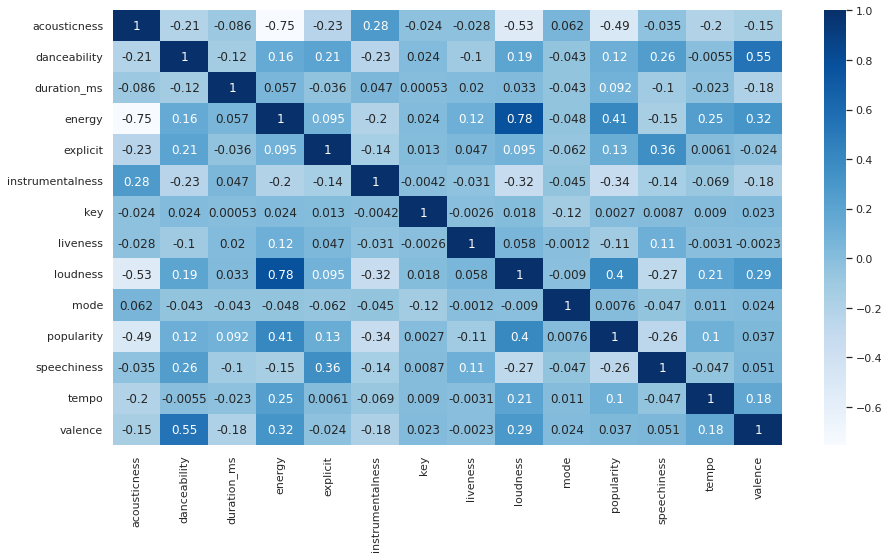

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(df1.corr(),annot=True,cmap='Blues')
plt.show()

#  VISUALIZATION

In [16]:
from matplotlib import cm
color = cm.inferno_r(np.linspace(.4, .8, 30))

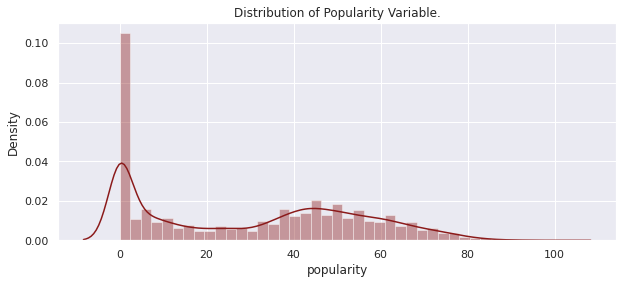

In [20]:
plt.figure(figsize=(10,4))
plt.title("Distribution of Popularity Variable.")
sns.distplot(data['popularity'],color='#8B1A1A');

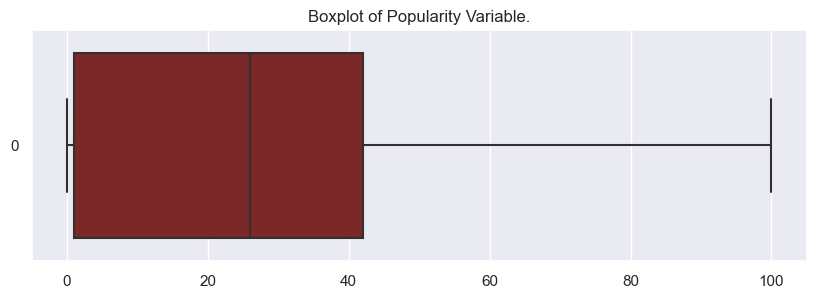

In [ ]:
plt.figure(figsize=(10,3))
plt.title("Boxplot of Popularity Variable.")
sns.boxplot(data=data['popularity'],color='#8B1A1A',orient='horizontal');

In [ ]:
data.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year'],
      dtype='object')

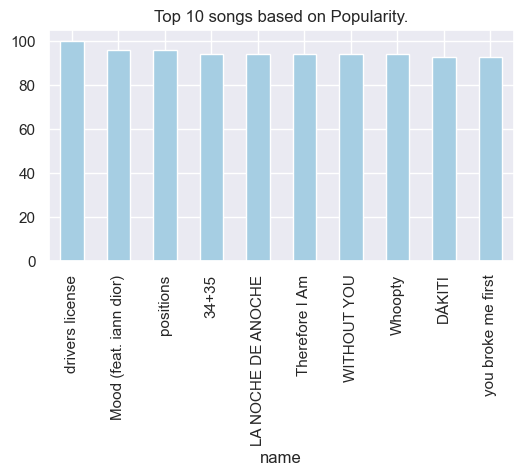

In [ ]:
plt.figure(figsize=(6,3))
plt.title("Top 10 songs based on Popularity.")
data.groupby('name').mean()['popularity'].sort_values(ascending=False).head(10).plot(kind='bar',colormap='Paired');

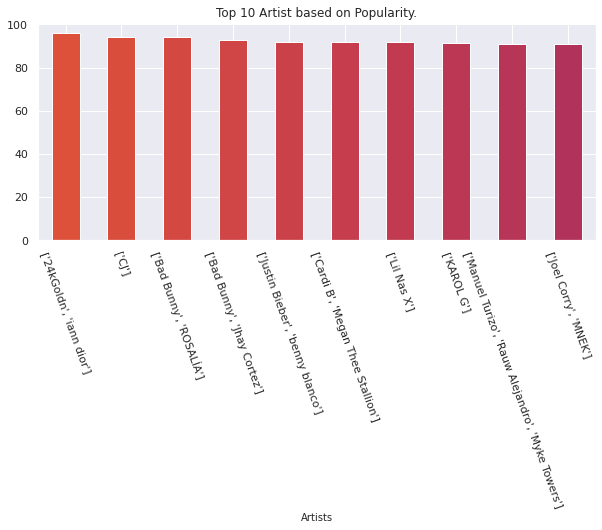

In [21]:
plt.figure(figsize=(10,4))
plt.title("Top 10 Artist based on Popularity.")
data.groupby('artists').mean()['popularity'].sort_values(ascending=False).head(10).plot(kind='bar',color=color,stacked=True)
plt.xlabel('Artists',fontsize=10)
plt.xticks(rotation=-70);

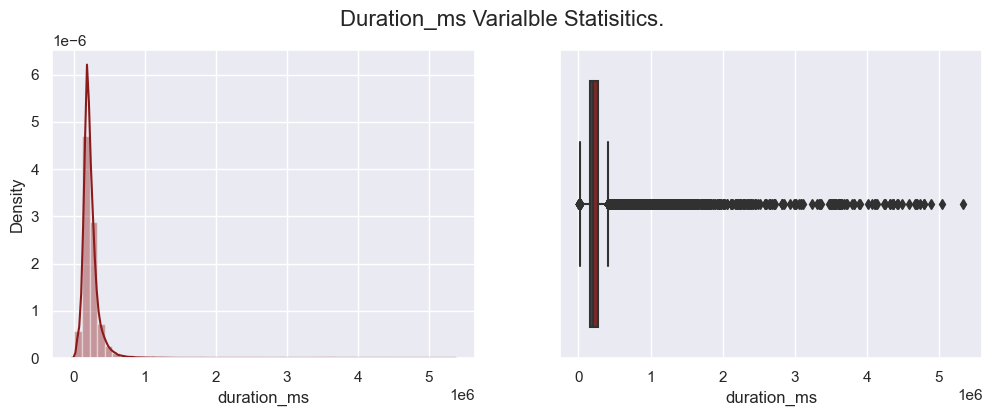

In [ ]:
plt.figure(figsize=(12,4))
plt.suptitle("Duration_ms Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['duration_ms'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['duration_ms'],color='#8B1A1A');

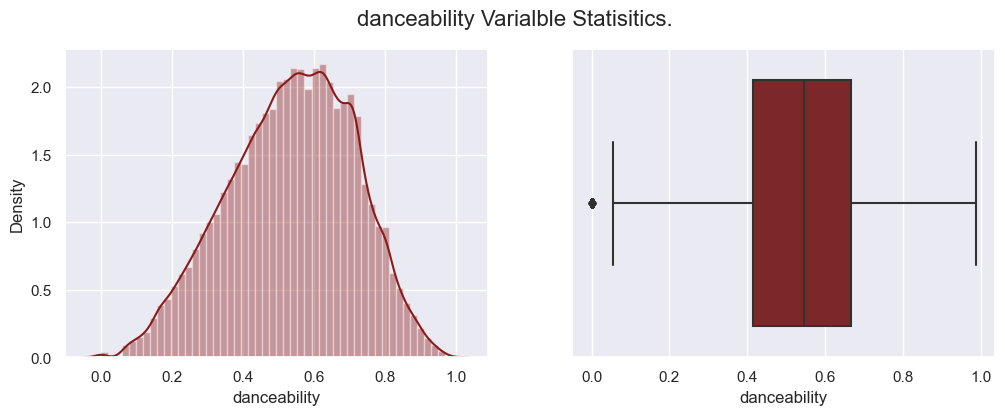

In [ ]:
plt.figure(figsize=(12,4))
plt.suptitle("danceability Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['danceability'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['danceability'],color='#8B1A1A');

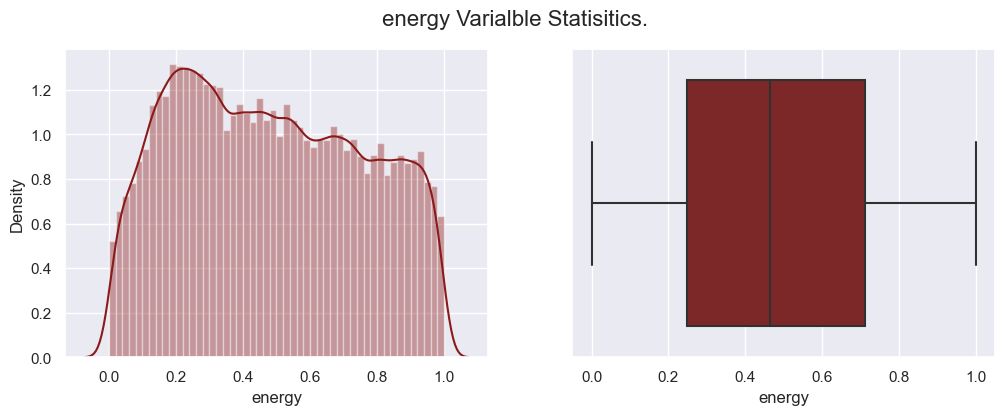

In [ ]:
plt.figure(figsize=(12,4))
plt.suptitle("energy Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(df['energy'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(df['energy'],color='#8B1A1A');

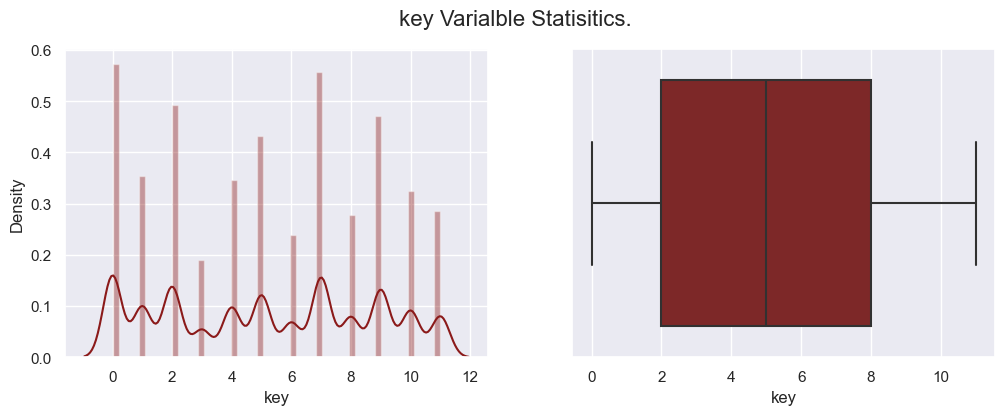

In [ ]:
plt.figure(figsize=(12,4))
plt.suptitle("key Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['key'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['key'],color='#8B1A1A');

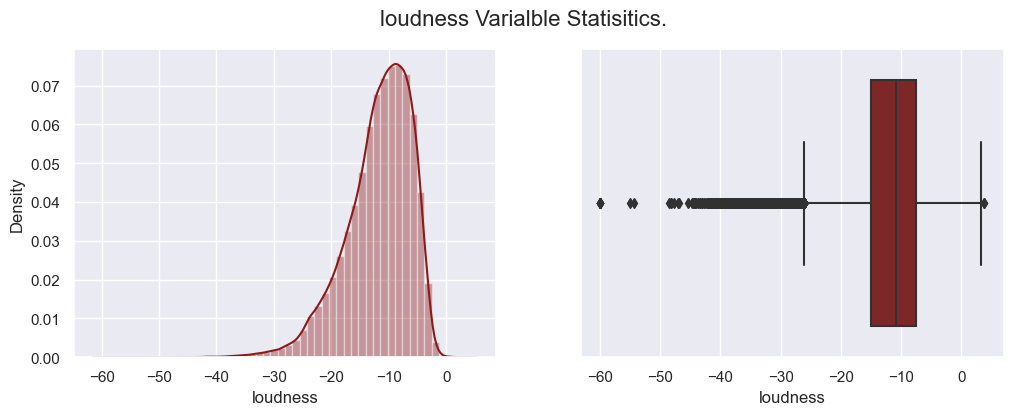

In [ ]:
plt.figure(figsize=(12,4))
plt.suptitle("loudness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['loudness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['loudness'],color='#8B1A1A');

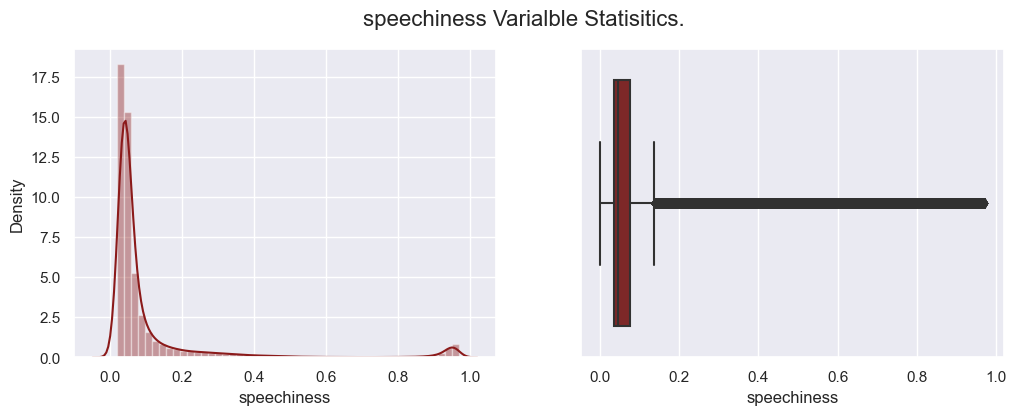

In [ ]:
plt.figure(figsize=(12,4))
plt.suptitle("speechiness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['speechiness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['speechiness'],color='#8B1A1A');

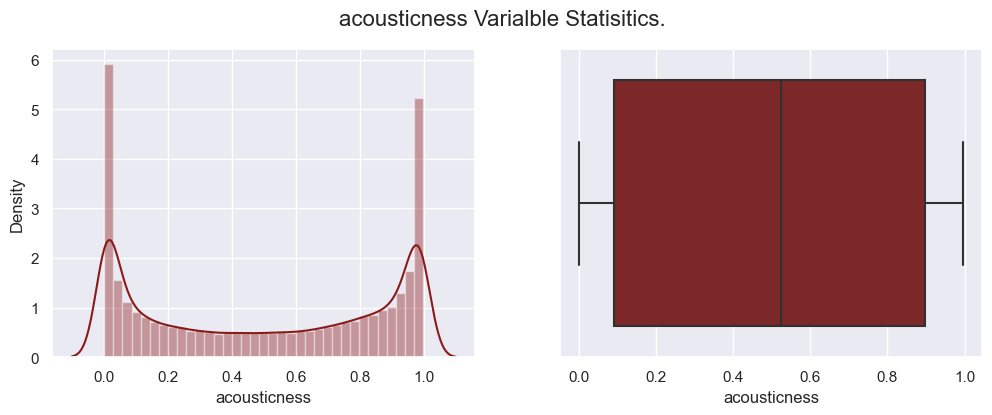

In [ ]:
plt.figure(figsize=(12,4))
plt.suptitle("acousticness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['acousticness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['acousticness'],color='#8B1A1A');

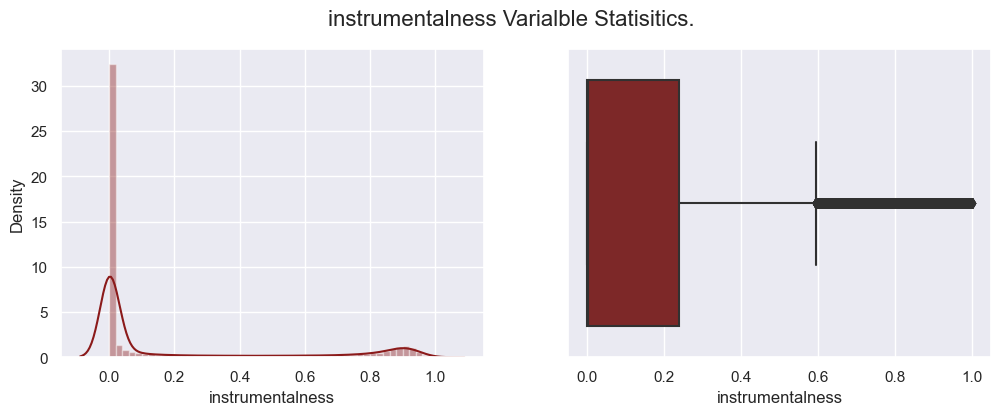

In [ ]:
plt.figure(figsize=(12,4))
plt.suptitle("instrumentalness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['instrumentalness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['instrumentalness'],color='#8B1A1A');

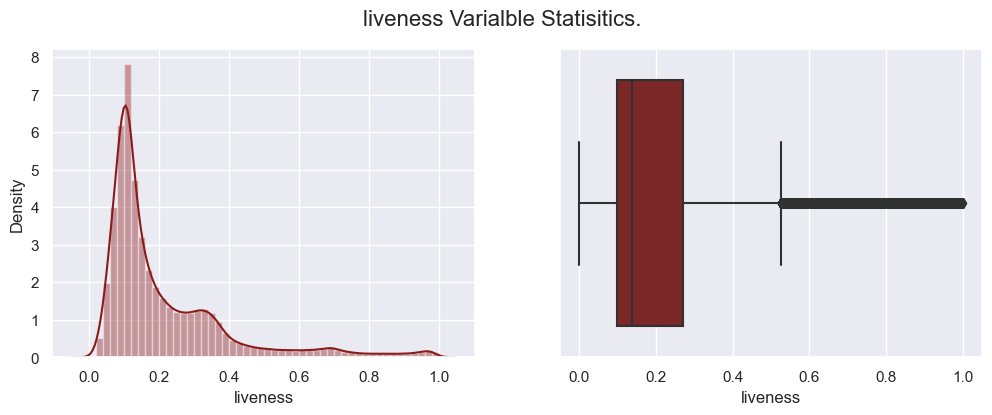

In [ ]:
plt.figure(figsize=(12,4))
plt.suptitle("liveness Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['liveness'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['liveness'],color='#8B1A1A');

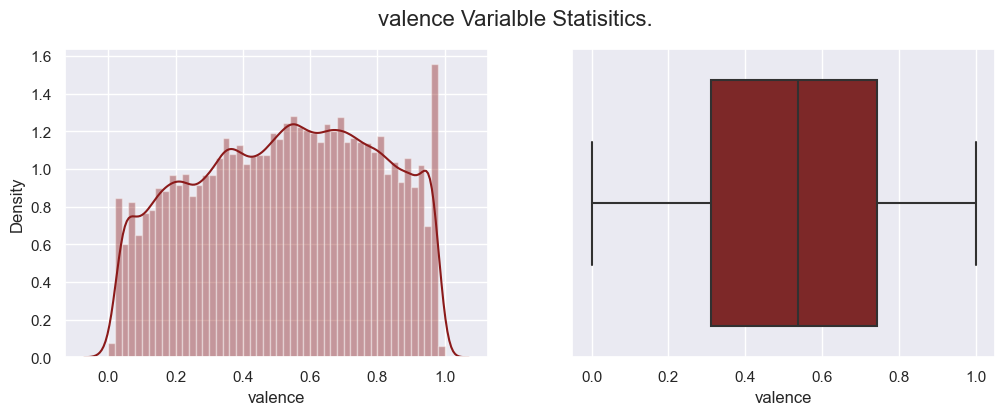

In [ ]:
plt.figure(figsize=(12,4))
plt.suptitle("valence Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['valence'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['valence'],color='#8B1A1A');

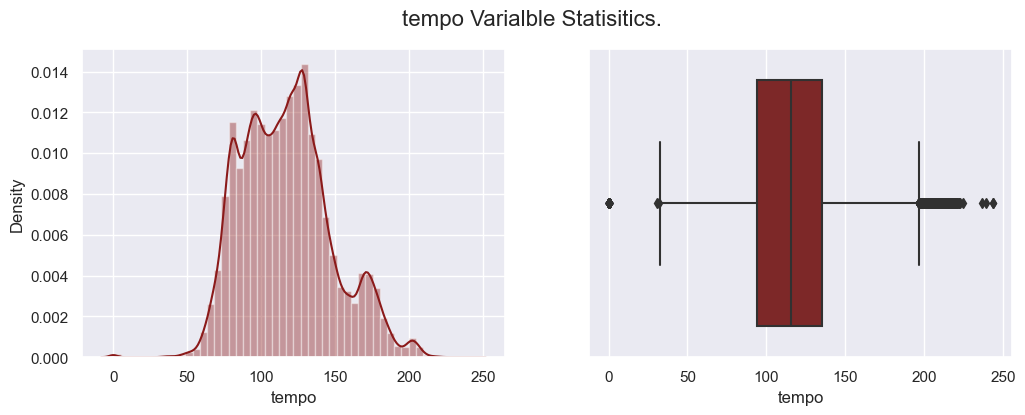

In [ ]:
plt.figure(figsize=(12,4))
plt.suptitle("tempo Varialble Statisitics.",fontsize=16)
plt.subplot(1,2,1)
sns.distplot(data['tempo'],color='#8B1A1A')
plt.subplot(1,2,2)
sns.boxplot(data['tempo'],color='#8B1A1A');

# MODEL BUILDING

## Content based Recommendation system

In [22]:
from sklearn.preprocessing import MinMaxScaler
datatypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
scaler = MinMaxScaler()
normalization = data.select_dtypes(include=datatypes)
normalization = scaler.fit_transform(normalization)


In [ ]:
normalization

array([[0.99497992, 0.60526316, 0.03063657, ..., 0.61590016, 0.634     ,
        0.        ],
       [0.64558233, 0.86234818, 0.02723665, ..., 0.35682342, 0.95      ,
        0.        ],
       [0.99698795, 0.6548583 , 0.0297917 , ..., 0.40080983, 0.689     ,
        0.        ],
       ...,
       [0.79819277, 0.43421053, 0.02620916, ..., 0.38894159, 0.228     ,
        1.        ],
       [0.79819277, 0.43421053, 0.02620916, ..., 0.38894159, 0.228     ,
        1.        ],
       [0.92369478, 0.46761134, 0.04482405, ..., 0.70354856, 0.32      ,
        1.        ]])

Here I will normalize all the numerical columns, for that, I will be selecting all the columns with int and float datatypes.

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
TWSS = []
k = list(range(1, 15))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df1)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

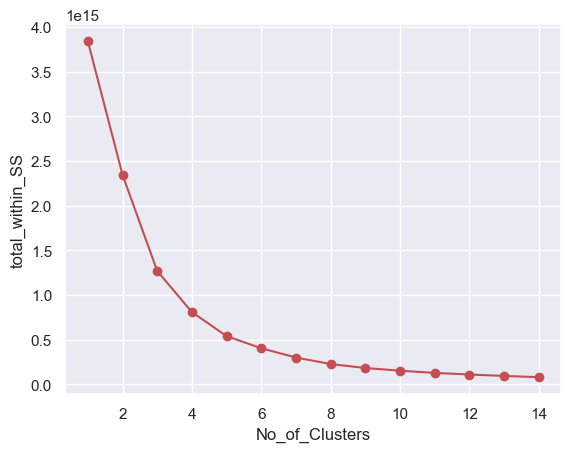

In [ ]:
plt.plot(k, TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS")

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
features = kmeans.fit_predict(normalization)
data['features'] = features

In [ ]:
data

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,features
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,3
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,3
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,4
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,2
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174379,0.795000,['Alessia Cara'],0.429,144720,0.211,0,45XnLMuqf3vRfskEAMUeCH,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021,4
174381,0.795000,['Alessia Cara'],0.429,144720,0.211,0,4pPFI9jsguIh3wC7Otoyy8,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021,4
174383,0.795000,['Alessia Cara'],0.429,144720,0.211,0,52YtxLVUyvtiGPxwwxayHZ,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021,4
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021,4


In [ ]:
data[data['features']==0]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,features
5,0.99600,['Mamie Smith & Her Jazz Hounds'],0.424,198627,0.2450,0,3HnrHGLE9u2MjHtdobfWl9,0.799,5,0.2350,-11.470,1,Crazy Blues - 78rpm Version,9,1920,0.0397,103.870,0.4770,1920,0
8,0.99600,['Francisco Canaro'],0.469,146840,0.2380,0,02i59gYdjlhBmbbWhf8YuK,0.960,8,0.1490,-18.717,1,La Chacarera - Remasterizado,0,1920-07-08,0.0741,130.060,0.6210,1920,0
9,0.00682,['Meetya'],0.571,476304,0.7530,0,06NUxS2XL3efRh0bloxkHm,0.873,8,0.0920,-6.943,1,Broken Puppet - Original Mix,0,1920-01-01,0.0446,126.993,0.1190,1920,0
11,0.99600,['Francisco Canaro'],0.579,167213,0.3560,0,0ANuF7SvPeIHanGcCpy9jR,0.948,10,0.1740,-14.574,1,Desengaño - Remasterizado,0,1920-07-08,0.0394,131.494,0.7030,1920,0
12,0.99200,['Ka Koula'],0.353,285707,0.3960,0,0BEO6nHi1rmTOPiEZvCIDW,0.924,1,0.3120,-14.053,1,Ta oula sou,0,1920-01-01,0.0447,111.268,0.5660,1920,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174124,0.98100,['October'],0.520,226603,0.1980,0,1g6Zm6BiN3WktHGzu0ZKAh,0.909,1,0.1020,-23.823,1,A Good Year - 2020 Remastered,5,2013,0.0483,123.976,0.2720,2013,0
174172,0.85200,['caleb scarberry'],0.555,174010,0.2990,1,7Kvz6HUGWyzKpLewRNykaa,0.690,9,0.1540,-9.661,1,2020 was the worst year of my fucking life - F...,5,2021-01-05,0.5970,109.204,0.6180,2021,0
174365,0.97600,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.358,381150,0.1210,0,0sZ6HFSulsrOl6VTBwp6jd,0.889,2,0.1350,-25.111,1,I giorni,0,2021-01-23,0.0532,131.808,0.1060,2021,0
174369,0.99500,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.297,349200,0.0287,0,2LeqqwzobL5ktfQhWA3bHh,0.908,8,0.0995,-30.008,1,Nuvole bianche,0,2021-01-23,0.0564,141.636,0.0678,2021,0


In [ ]:
data[data['features']==1]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,features
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.299,1920,1
23,0.010500,['Ron van der Kraan'],0.763,324333,0.363,0,0Rfu6umKtRBny2reKydNph,0.000000,10,0.0956,-21.045,0,Sweet Reggae Music,1,1920-01-03,0.1690,88.007,0.447,1920,1
31,0.032300,['Meetya'],0.697,489012,0.617,0,0Yt4hib6XmdB0YOkVl3QoL,0.902000,11,0.1490,-9.510,0,Day After - Original Mix,0,1920-01-01,0.0609,133.982,0.321,1920,1
34,0.021000,"[""The Swingin' Bachelors""]",0.559,288293,0.830,0,0bq1lNI8OPhdRQYZZSSnQk,0.146000,11,0.1870,-7.876,0,Voodoo Doll,0,1920-02-29,0.0546,107.912,0.352,1920,1
44,0.000103,['Two Charming Men'],0.779,375015,0.724,0,0vhLeFi24U1oYB0odNNVV3,0.887000,11,0.1230,-7.373,0,Brusque - Original Mix,0,1920-01-01,0.0482,128.004,0.226,1920,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174335,0.303000,"['ZAYN', 'Syd']",0.695,191933,0.582,0,4iC9bQomdbH5YPYi4HrECX,0.007690,8,0.0717,-9.405,0,When Love's Around (feat. Syd),55,2021-01-15,0.1460,173.976,0.346,2021,1
174349,0.125000,"['Sfera Ebbasta', 'J Balvin']",0.755,193555,0.882,1,2GIJ1Lw3ZoYUUYCABVjPcQ,0.001420,10,0.1030,-1.957,0,Baby,1,2021-01-22,0.0532,99.984,0.606,2021,1
174355,0.498000,['ZAYN'],0.597,196493,0.368,0,3HSUqAErTyFQWLfLdnFVnB,0.000000,2,0.1090,-10.151,0,Connexion,52,2021-01-15,0.0936,171.980,0.590,2021,1
174359,0.598000,['Sean Paul'],0.735,211520,0.846,0,1spt3fYeaUNtoZHg3E6wrL,0.000000,10,0.1080,-3.110,0,Get Busy,1,2021-01-22,0.0355,100.197,0.725,2021,1


In [ ]:
data[data['features']==2]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,features
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,2
13,0.004780,['Justrock'],0.643,304078,0.998,0,0DH1IROKoPK5XTglUt9Pq0,0.476000,1,0.1050,-6.120,1,Schumacher,0,1920-01-01,0.0566,124.018,0.6390,1920,2
20,0.023900,['Ron van der Kraan'],0.744,215773,0.428,0,0MwMyEO5AxYpghTU6gB85H,0.000031,9,0.1060,-21.081,1,On a Ragga Trip,8,1920-01-03,0.0376,140.011,0.5780,1920,2
25,0.250000,['Jodoli'],0.521,142445,0.776,0,0TT2zA8fatUuvTnPABz3lS,0.000880,1,0.1750,-7.919,1,Taro Yard Slaughter House,0,1920-01-29,0.2680,159.775,0.5670,1920,2
37,0.007440,['Ron van der Kraan'],0.737,225707,0.328,0,0gIniSwikXODTBupqYPCI1,0.000002,0,0.0765,-18.800,1,Sweat (A La La La La Long),0,1920-01-03,0.0526,172.025,0.7980,1920,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174341,0.353000,['ZAYN'],0.691,174520,0.410,0,2QLhdiuiQjnNviR9veVs6a,0.000000,2,0.1310,-7.135,1,Better,55,2021-01-15,0.2450,84.632,0.0904,2021,2
174345,0.096500,"['ZAYN', 'Devlin']",0.724,188800,0.640,0,1N4aZ62mHHZqNOOJme0G6f,0.000031,9,0.2680,-5.545,1,Windowsill (feat. Devlin),54,2021-01-15,0.1710,149.925,0.2640,2021,2
174347,0.325000,['ZAYN'],0.336,164733,0.430,0,2M9YhtiwNJrGVRvTm2gbnb,0.000636,1,0.1430,-11.742,1,Unf**kwitable,54,2021-01-15,0.0430,169.087,0.4970,2021,2
174351,0.009840,['Foo Fighters'],0.530,253840,0.759,0,3NUmUIyzNLBp8bCFMH8Mif,0.000000,7,0.3190,-7.067,1,Waiting On A War,69,2021-01-14,0.0351,131.999,0.5020,2021,2


In [ ]:
data[data['features']==3]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,features
0,0.991,['Mamie Smith'],0.598,168333,0.2240,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,3
1,0.643,"[""Screamin' Jay Hawkins""]",0.852,150200,0.5170,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,3
10,0.952,['Dorville'],0.688,150067,0.2200,0,07jrRR1CUUoPb1FLfSy9Jh,0.000000,6,0.2620,-15.208,0,Oouin,0,1920,0.8450,82.024,0.4140,1920,3
19,0.993,['Amalia Vaka'],0.397,258160,0.4840,0,0LYNwxHYHPW256lO2phedM,0.179000,5,0.3270,-11.892,0,Thelo na se lismoniso,0,1920-01-01,0.0498,65.485,0.5150,1920,3
26,0.959,['Athanasía Alexandropoúlou'],0.603,214773,0.3720,0,0UYplqEm5qa4hkEo64C0TW,0.012900,8,0.1740,-12.666,0,"I photoúla, beráti",0,1920-01-01,0.0741,118.351,0.9010,1920,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174337,0.942,['ZAYN'],0.557,187560,0.2920,0,1VBS77pnYxi5FqCE41CHlL,0.000201,10,0.1060,-14.414,0,Calamity,55,2021-01-15,0.1130,141.684,0.0444,2021,3
174363,0.966,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.269,424200,0.0926,0,0qQPTWtCFnAI4SucF4ytVb,0.890000,9,0.0992,-24.280,0,Divenire,0,2021-01-23,0.0609,120.323,0.1020,2021,3
174367,0.966,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.269,424200,0.0926,0,1Svqb7CX6rQvJpZY3iVBXh,0.890000,9,0.0992,-24.280,0,Divenire,0,2021-01-23,0.0609,120.323,0.1020,2021,3
174371,0.995,"['Ludovico Einaudi', 'Johannes Bornlöf']",0.343,206700,0.0165,0,3Glmyv3hbGGTgeR3FZrxJA,0.878000,9,0.0774,-30.915,0,Una Mattina,0,2021-01-23,0.0455,126.970,0.1510,2021,3


In [25]:
class Spotify_Recommendation():
    def __init__(self, dataset):
        self.dataset = dataset
    def recommend(self, songs, amount=1):
        distance = []
        song = self.dataset[(self.dataset.name.str.lower() == songs.lower())].head(1).values[0]
        rec = self.dataset[self.dataset.name.str.lower() != songs.lower()]
        for songs in tqdm(rec.values):
            d = 0
            for col in np.arange(len(rec.columns)):
                if not col in [1, 6, 12, 14, 18]:
                    d = d + np.absolute(float(song[col]) - float(songs[col]))
            distance.append(d)
        rec['distance'] = distance
        rec = rec.sort_values('distance')
        columns = ['artists', 'name']
        return rec[columns][:amount]

In [27]:
recommendations = Spotify_Recommendation(data)
recommendations.recommend("Country Junction", 10)

100%|██████████| 60242/60242 [00:03<00:00, 16622.35it/s]


,artists,name
25,['Jodoli'],Taro Yard Slaughter House
48021,['Buffalo Springfield'],I Am a Child
27454,['Elvis Presley'],Shoppin' Around
6572,['Sonny Rollins'],Mambo Bounce
26469,['Danny Kaye'],My Heart Knows A Lovely Song
4312,"['Stéphane Grappelli', 'Django Reinhardt', 'Qu...",Some of these Days
14444,['Brad Kane'],One Jump Ahead
32221,['Meat Puppets'],Plateau
55057,['Brad Kane'],"One Jump Ahead - From ""Aladdin""/Soundtrack Ver..."
46785,['Mahalia Jackson'],Joy To The World!


# Popularity Based Recommedation System 

In [ ]:
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,features
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920,3
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920,3
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920,4
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920,2
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920,1


In [ ]:
data1 = data.groupby('name').mean()['popularity'].sort_values(ascending=False).head(10)

In [ ]:
data1

name
drivers license           100.0
Mood (feat. iann dior)     96.0
positions                  96.0
34+35                      94.0
LA NOCHE DE ANOCHE         94.0
Therefore I Am             94.0
WITHOUT YOU                94.0
Whoopty                    94.0
DÁKITI                     93.0
you broke me first         93.0
Name: popularity, dtype: float64

In [9]:
import pickle

In [28]:
pickle.dump(recommendations,open('recommendations.pkl','wb'))